In [1]:
#Import the necessary libraries.

import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)


# Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv(r'C:\Users\parag\Desktop\ironhack\lab\week8\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv') # this file is in files_for_lesson_and_activities folder
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# First look at its main features (head, shape, info).

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
customer_df.shape

(9134, 24)

In [5]:
# Standardize dataframe columns and explore dataset
customer_df.columns = customer_df.columns.str.lower().str.replace(' ','_')
customer_df.drop_duplicates()
# I see customer columns has all unique value so I set it as index
customer_df = customer_df.set_index('customer')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   customer_lifetime_value        9134 non-null   float64
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   effective_to_date              9134 non-null   object 
 6   employmentstatus               9134 non-null   object 
 7   gender                         9134 non-null   object 
 8   income                         9134 non-null   int64  
 9   location_code                  9134 non-null   object 
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null

In [6]:
numerical = customer_df.select_dtypes(include=np.number)
categoricals = customer_df.select_dtypes(include=np.object)
print('Numerical Data into dataframe:')
display(numerical.head())
print('Categorical Data into dataframe:')
display(categoricals.head())

Numerical Data into dataframe:


C:\Users\parag\AppData\Local\Temp/ipykernel_17896/1469232485.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(include=np.object)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


Categorical Data into dataframe:


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [8]:
# distributions
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Change effective to date column to datetime format.

In [10]:
customer_df.effective_to_date = pd.to_datetime(categoricals.effective_to_date) # mantaining same format
customer_df.effective_to_date.head()

customer
BU79786   2011-02-24
QZ44356   2011-01-31
AI49188   2011-02-19
WW63253   2011-01-20
HB64268   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

# Check for NaN values for columns

In [12]:
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Differentiate between continous numerical, discrete numerical and categorical values. Return a list with the three subdataset

In [13]:
#7/2/9.Define a function that differentiates between continuous and discrete variables.
#5000 is the number chosen it being close to 60% of the rows of the dataframe

def continuous_discrete(x):
    discrete = []
    continuous = []
    categorical = x.select_dtypes(include = np.object)
    numerical = x.select_dtypes(include = np.number)
    for col in numerical.columns:
        if numerical[col].nunique() > 5000:
            continuous.append(col)
        else:
            discrete.append(col)
    return x[discrete],x[continuous],categorical

In [14]:
discrete,continuous,categorical = continuous_discrete(customer_df)

C:\Users\parag\AppData\Local\Temp/ipykernel_17896/1077721204.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = x.select_dtypes(include = np.object)


In [17]:
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer,,,,,,
BU79786,56274,69,32,5,0,1
QZ44356,0,94,13,42,0,8
AI49188,48767,108,18,38,0,2
WW63253,0,106,18,65,0,7
HB64268,43836,73,12,44,0,1


In [18]:
categorical["state"].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [19]:
# 8/10.For the categorical data, check if there is some kind of text in a variable so we would need to clean it.

def checkcategorical(x):
    truecategorical = []
    idcategorical = []
    for col in x.columns:
        print (col , x[col].unique())
        if x[col].nunique() > 50:
            idcategorical.append(col)
        else:
            truecategorical.append(col)
    return x[idcategorical],x[truecategorical]
        
idcategorical,truecategorical = checkcategorical(categorical)

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


In [20]:
#9/11.Get categorical features.

#truecategorical = truecategorical.join(the_index).set_index("customer")
truecategorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [21]:
#10/12.What should we do with the customer_id column?

#Since all the customer values are different they can be used as an id.

idcategorical.nunique()

Series([], dtype: float64)

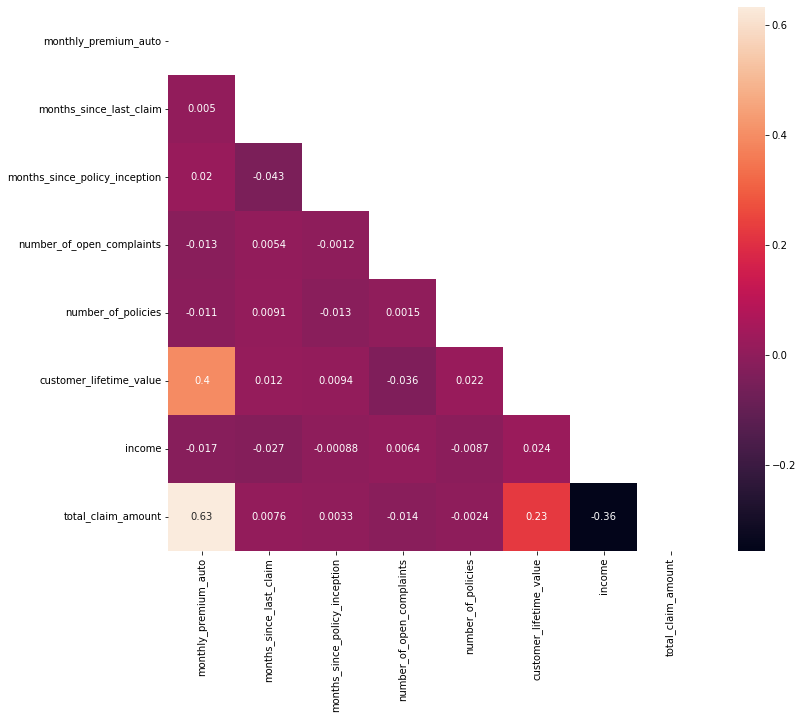

' i can see overall low correlations between the values except with total_claim_ammount and monthly_\npremium_auto which and a decent negative correlation with income'

In [22]:
#3.Plot a correlation matrix, what can you see? (with the numerical values)
all_numericals = pd.concat([discrete,continuous], axis=1)

mask = np.zeros_like(all_numericals.corr())

mask[np.triu_indices_from(mask)] = True #hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(all_numericals.corr(), mask=mask, annot=True)
plt.show()

""" i can see overall low correlations between the values except with total_claim_ammount and monthly_
premium_auto which and a decent negative correlation with income"""

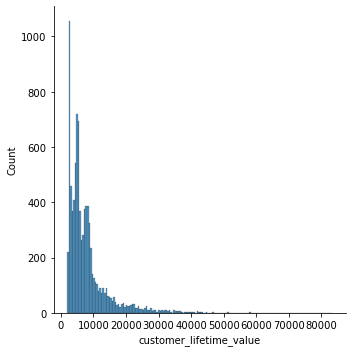

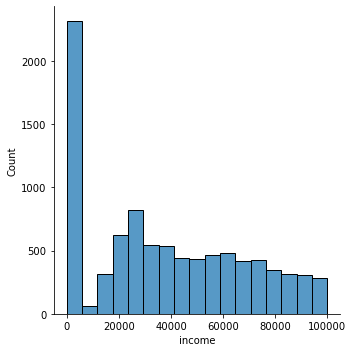

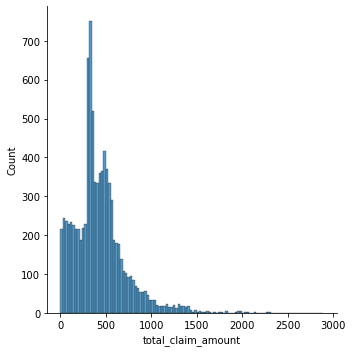

In [23]:
#4.Create a function to plot every discrete variables. Do the same with continuous variables.

#continuous variables:def plot_continuous(x):

def plot_continuous(x):
    for column in x.select_dtypes(np.number).columns:
        (sns.displot(x[column]))
        plt.show()
plot_continuous(continuous)

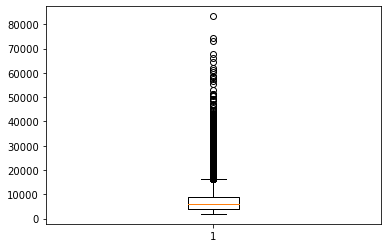

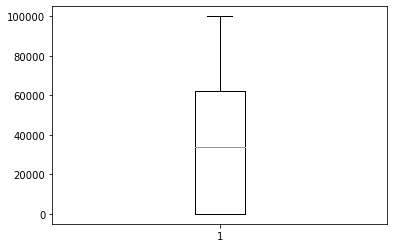

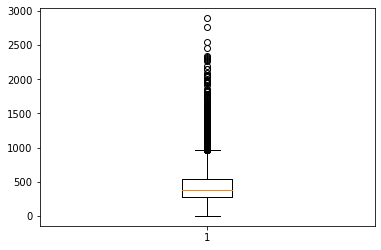

In [24]:
#6.Look for outliers in the continuous variables we have found.

def continuous_outliers(continuous):
    for column in continuous:
        (plt.boxplot(column , data=continuous))
        plt.show()
        
continuous_outliers(continuous)

In [27]:
#7.Have you found outliers? If you have, what should we do with them? (yes) 

def filter_boys(continuous):
    for column in continuous:
        Q1 = continuous[column].quantile(0.25)
        Q3 = continuous[column].quantile(0.75)
        IQR = Q3 - Q1 

        filter = (continuous[column] >= Q1 - 1.5 * IQR) & (continuous[column] <= Q3 + 1.5 *IQR)
        return continuous.loc[filter]

continuous = filter_boys(continuous)
continuous

,customer_lifetime_value,income,total_claim_amount
customer,,,
BU79786,2763.519279,56274,384.811147
QZ44356,6979.535903,0,1131.464935
AI49188,12887.431650,48767,566.472247
WW63253,7645.861827,0,529.881344
HB64268,2813.692575,43836,138.130879
...,...,...,...
YM19146,4100.398533,47761,541.282007
PK87824,3096.511217,21604,379.200000
TD14365,8163.890428,0,790.784983


# Lab | Feature extraction

In [28]:
#1.Open the categoricals variable we created before.

truecategorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


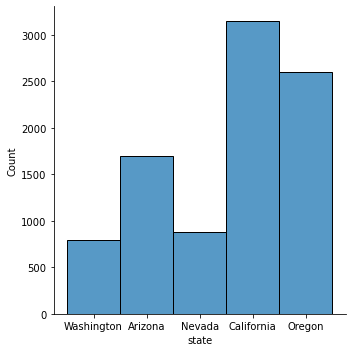

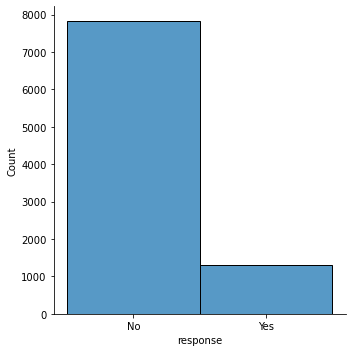

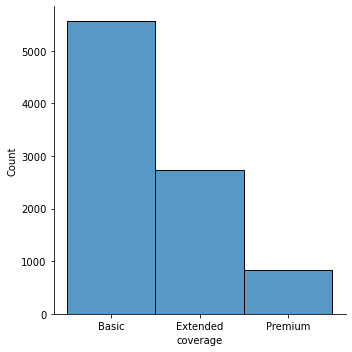

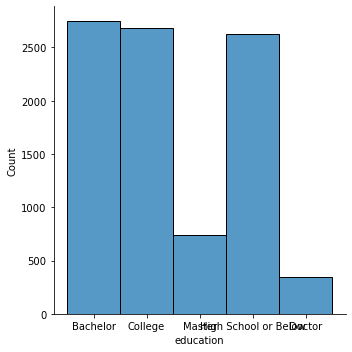

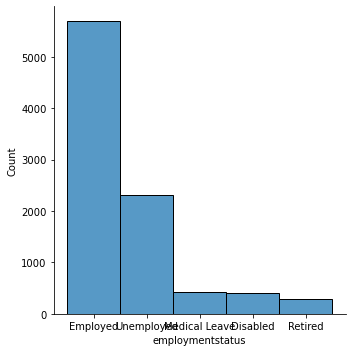

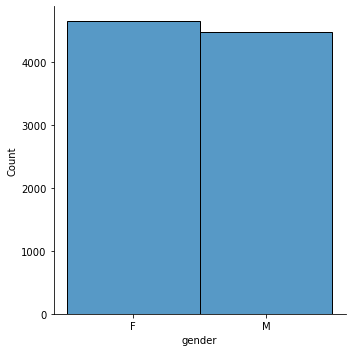

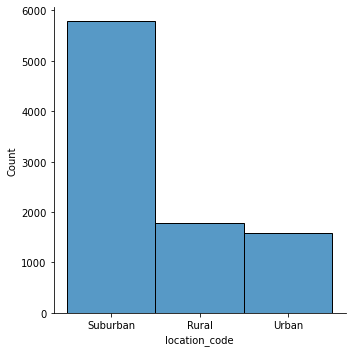

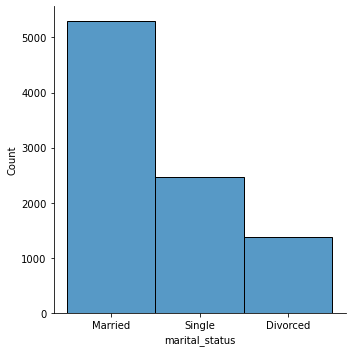

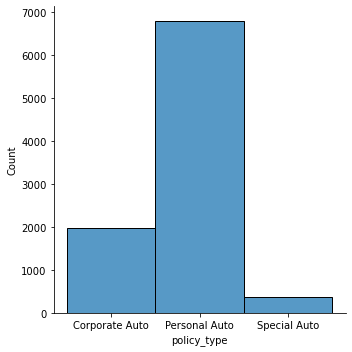

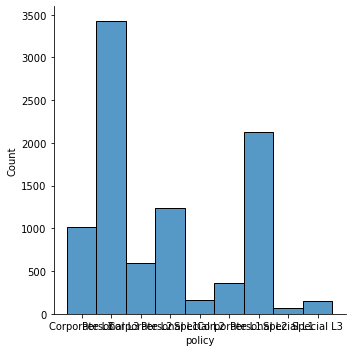

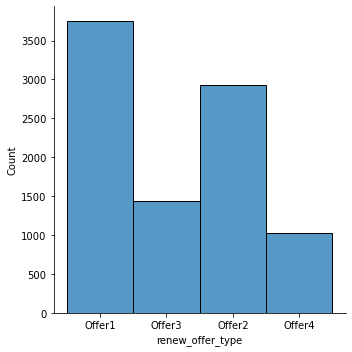

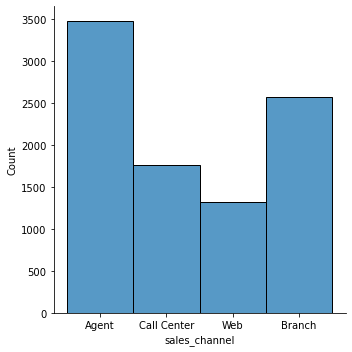

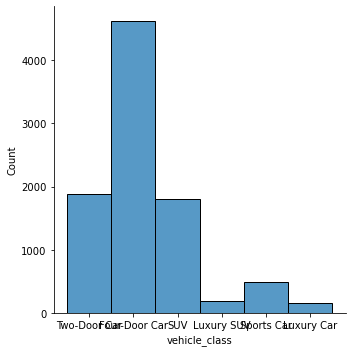

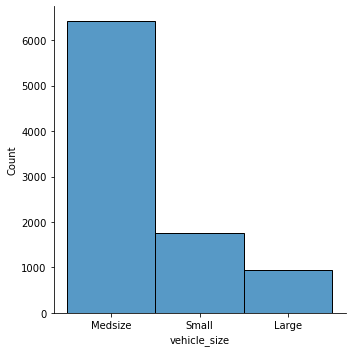

In [29]:
#2.Plot all the categorical variables with the proper plot. What can you see?

def plot_categorical(x):
    for column in x.columns:
        (sns.displot(x[column]))

plot_categorical(truecategorical)


In [30]:
#3.There might be some columns that seem to be redundant, check their values to be sure. 
# What should we do with them?

"""In this particular case there were no redundant values in columns, all of them provide a specific piece
of information that seem to be valuable when applied with a prediction model. Maybe some features could be
highly correlated between themselves and that would make them redundant but at this point in the project
I don't know so i will leave them in so i am not losing data that could be important before testing."""

"In this particular case there were no redundant values in columns, all of them provide a specific piece\nof information that seem to be valuable when applied with a prediction model. Maybe some features could be\nhighly correlated between themselves and that would make them redundant but at this point in the project\nI don't know so i will leave them in so i am not losing data that could be important before testing."

'The way the plot currently is nothing can be extracted from it since there is too much data.\nOne way to maybe extract something from it would be to plot it with other column so that the plot can\nmaybe give some usefull information.'

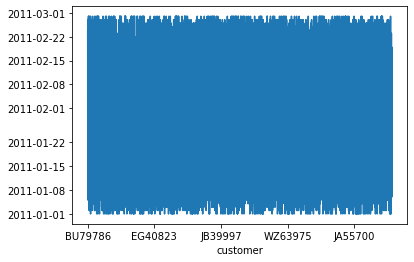

In [32]:
#4.Plot time variable. Can you extract something from it?

customer_df["effective_to_date"].plot()

"""The way the plot currently is nothing can be extracted from it since there is too much data.
One way to maybe extract something from it would be to plot it with other column so that the plot can
maybe give some usefull information."""

# Lab | Data cleaning and wrangling

In [33]:
#1.We will start with removing outliers. So far, we have discussed different methods to remove outliers.
#Use the one you feel more comfortable with, define a function for that.
#Use the function to remove the outliers and apply it to the dataframe.

"""Already done in the previous lab """

'Already done in the previous lab '

In [34]:
#2.Create a copy of the dataframe for the data wrangling.

data01 = customer_df.copy()

In [36]:
#3.Normalize the continuous variables. You can use any one method you want.
#using minmaxscaller

from sklearn.preprocessing import MinMaxScaler

continuous2 = continuous.copy()

#setting index from the continuous data and storing in a variable for latter aplication
index_c = continuous2.index

scaler = MinMaxScaler()

continuous2 = scaler.fit_transform(continuous2)

#transforming the array into a dataframe and setting previous created index
continuous2 = pd.DataFrame(continuous2).set_index(index_c)
continuous2

,0,1,2
customer,,,
BU79786,0.067322,0.562847,0.132974
QZ44356,0.395254,0.000000,0.391051
AI49188,0.854786,0.487763,0.195764
WW63253,0.447083,0.000000,0.183117
HB64268,0.071224,0.438443,0.047710
...,...,...,...
YM19146,0.171308,0.477701,0.187057
PK87824,0.093223,0.216081,0.131034
TD14365,0.487376,0.000000,0.273297


In [37]:
#4.Encode the categorical variables

truecategorical = pd.get_dummies(truecategorical, drop_first=True)
truecategorical

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
PK87824,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
TD14365,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [38]:
#5.The time variable can be useful.
#Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
import datetime

customer_df['year_'] = customer_df['effective_to_date'].dt.year
customer_df['month_'] = customer_df['effective_to_date'].dt.month
customer_df['day_'] = customer_df['effective_to_date'].dt.day

customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year_,month_,day_
customer,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,24
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,19
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,20
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2,3


In [40]:
date_values = customer_df[["year_","month_","day_"]]

date_values

,year_,month_,day_
customer,,,
BU79786,2011,2,24
QZ44356,2011,1,31
AI49188,2011,2,19
WW63253,2011,1,20
HB64268,2011,2,3
...,...,...,...
LA72316,2011,2,10
PK87824,2011,2,12
TD14365,2011,2,6


In [41]:
#6.Since the model will only accept numerical data, check and make sure that every column is numerical,
#if some are not, change it using encoding.

"""merging the data point in a new dataframe"""
#merged_data = pd.concat([truecategorical, continuous,date_values,discrete], axis=1)

merged_data = truecategorical.join(continuous).join(date_values).join(discrete)

merged_data

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,customer_lifetime_value,income,total_claim_amount,year_,month_,day_,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2763.519279,56274.0,384.811147,2011,2,24,69,32,5,0,1
QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,6979.535903,0.0,1131.464935,2011,1,31,94,13,42,0,8
AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,12887.431650,48767.0,566.472247,2011,2,19,108,18,38,0,2
WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,7645.861827,0.0,529.881344,2011,1,20,106,18,65,0,7
HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2813.692575,43836.0,138.130879,2011,2,3,73,12,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,NaN,NaN,NaN,2011,2,10,73,18,89,0,2
PK87824,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3096.511217,21604.0,379.200000,2011,2,12,79,14,28,0,1
TD14365,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,8163.890428,0.0,790.784983,2011,2,6,85,9,37,3,2


In [42]:
merged_data.isna().sum()

state_California                    0
state_Nevada                        0
state_Oregon                        0
state_Washington                    0
response_Yes                        0
coverage_Extended                   0
coverage_Premium                    0
education_College                   0
education_Doctor                    0
education_High School or Below      0
education_Master                    0
employmentstatus_Employed           0
employmentstatus_Medical Leave      0
employmentstatus_Retired            0
employmentstatus_Unemployed         0
gender_M                            0
location_code_Suburban              0
location_code_Urban                 0
marital_status_Married              0
marital_status_Single               0
policy_type_Personal Auto           0
policy_type_Special Auto            0
policy_Corporate L2                 0
policy_Corporate L3                 0
policy_Personal L1                  0
policy_Personal L2                  0
policy_Perso

In [43]:
merged_data = merged_data.dropna(axis=0)

In [44]:
merged_data.isna().sum()

state_California                  0
state_Nevada                      0
state_Oregon                      0
state_Washington                  0
response_Yes                      0
coverage_Extended                 0
coverage_Premium                  0
education_College                 0
education_Doctor                  0
education_High School or Below    0
education_Master                  0
employmentstatus_Employed         0
employmentstatus_Medical Leave    0
employmentstatus_Retired          0
employmentstatus_Unemployed       0
gender_M                          0
location_code_Suburban            0
location_code_Urban               0
marital_status_Married            0
marital_status_Single             0
policy_type_Personal Auto         0
policy_type_Special Auto          0
policy_Corporate L2               0
policy_Corporate L3               0
policy_Personal L1                0
policy_Personal L2                0
policy_Personal L3                0
policy_Special L1           

In [45]:
#checking if all data is numerical (is it)
merged_data.dtypes

state_California                    uint8
state_Nevada                        uint8
state_Oregon                        uint8
state_Washington                    uint8
response_Yes                        uint8
coverage_Extended                   uint8
coverage_Premium                    uint8
education_College                   uint8
education_Doctor                    uint8
education_High School or Below      uint8
education_Master                    uint8
employmentstatus_Employed           uint8
employmentstatus_Medical Leave      uint8
employmentstatus_Retired            uint8
employmentstatus_Unemployed         uint8
gender_M                            uint8
location_code_Suburban              uint8
location_code_Urban                 uint8
marital_status_Married              uint8
marital_status_Single               uint8
policy_type_Personal Auto           uint8
policy_type_Special Auto            uint8
policy_Corporate L2                 uint8
policy_Corporate L3               

In [46]:
merged_data1 = merged_data.copy()

lascols = ['customer_lifetime_value', 'income',"total_claim_amount"]

merged_data1[lascols] = merged_data1[lascols].applymap(np.int64)

merged_data1.dtypes

state_California                  uint8
state_Nevada                      uint8
state_Oregon                      uint8
state_Washington                  uint8
response_Yes                      uint8
coverage_Extended                 uint8
coverage_Premium                  uint8
education_College                 uint8
education_Doctor                  uint8
education_High School or Below    uint8
education_Master                  uint8
employmentstatus_Employed         uint8
employmentstatus_Medical Leave    uint8
employmentstatus_Retired          uint8
employmentstatus_Unemployed       uint8
gender_M                          uint8
location_code_Suburban            uint8
location_code_Urban               uint8
marital_status_Married            uint8
marital_status_Single             uint8
policy_type_Personal Auto         uint8
policy_type_Special Auto          uint8
policy_Corporate L2               uint8
policy_Corporate L3               uint8
policy_Personal L1                uint8


# Lab | Comparing regression models

In [48]:
#1.In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

#train test split already imported in the cell 1

# splitting the data

X = merged_data.drop('monthly_premium_auto', axis=1)
y = merged_data['monthly_premium_auto']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
#applying simple linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
predictions = model.predict(X_test)

In [52]:
#not used but will keep here
# predictions = scaler.inverse_transform([model.predict(X_test)])

In [54]:
#test R2,MAE,MSE results from simple linear regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.96006984822312, 4.587667298648059, 6.027478444117754)

In [55]:
import math

results = pd.DataFrame()
results['true'] = y_test
predictions = model.predict(X_test)
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
customer,,,
RZ51338,74,67.578159,6.421841
GK71720,86,87.382899,1.382899
TL60066,65,69.150246,4.150246
YZ38778,95,89.658951,5.341049
FB17016,138,131.199206,6.800794
...,...,...,...
VC34797,62,66.772575,4.772575
KA13067,104,108.686395,4.686395
SB64064,66,66.988778,0.988778


C:\Users\parag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true', ylabel='pred'>

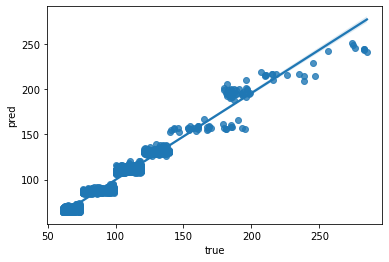

In [56]:
sns.regplot(results['true'], results['pred'])

In [57]:
#4.Use the function to check LinearRegressor and KNeighborsRegressor. KNeighborsRegressor Part
from sklearn.neighbors import KNeighborsRegressor

def kneib(X,y):
    neigh = KNeighborsRegressor(n_neighbors=2)
    neigh.fit(X, y)
    return neigh

model = kneib(X_train,y_train)
predictions = model.predict(X_test)

In [58]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.4493223964971794, 11.431464811783961, 22.383803893874042)

In [59]:
results = pd.DataFrame()
results['true'] = y_test
predictions = model.predict(X_test)
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
customer,,,
RZ51338,74,61.5,12.5
GK71720,86,86.0,0.0
TL60066,65,65.0,0.0
YZ38778,95,91.0,4.0
FB17016,138,138.0,0.0
...,...,...,...
VC34797,62,64.5,2.5
KA13067,104,100.5,3.5
SB64064,66,66.0,0.0


C:\Users\parag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true', ylabel='pred'>

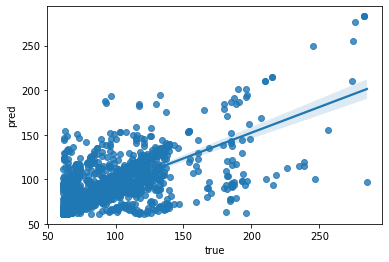

In [60]:
sns.regplot(results['true'], results['pred'])